# MNIST
The objective of this project is to use different algorithms from Sklearn and Tensorflow to identify hand-written digits, training our models using the MNIST dataset.

## 1. Read Data

In [1]:
'''
First, we need to download the mnist dataset from sklearn db
'''
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', return_X_y=True)

## 2. Data Preprocessing

In [2]:
'''
Because tf works with numpy ndarrays, we will convert the X data into numpy.
'''
X = X.to_numpy()

In [3]:
'''
We're gonna separate the data into a training set and a test set.
'''
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [4]:
'''
For regression, it is necessary to normalize the data before. Knowing that every image is on scale of greys, we can just divide every cell into 255, the maximum number that a byte can reach.
'''
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [5]:
'''
Tensorflow needs to recieve the dasaset as a matrix of 28x28, with a array of one value on it. This is possible using the reshape method.
'''
X_train_cnn = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_scaled.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
'''
Also needs to recieve the target as a category.
'''
from keras.utils.np_utils import to_categorical
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

## 3. Model Creation
For this project, we will be comparing the next algorithms:

In [7]:
"""
Logistic Regression
extrated from https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
"""
from sklearn.linear_model import LogisticRegression
#Let's create a scaled model from our scaled dataset
log_reg = LogisticRegression(C=50.0 / 5000, penalty='l1', solver='saga', tol=0.1, max_iter=100)

In [8]:
"""
SVM
extracted from https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html
"""
from sklearn.svm import SVC
svm = SVC()

In [9]:
'''
Random Forest
extracted from https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest
'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [10]:
'''
Neural Network (MPL)
exctracted from https://dmkothari.github.io/Machine-Learning-Projects/MLP_with_MNIST.html
'''
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier()

In [11]:
'''
CNN
extracted from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu')) #para interpretar matrices de 28x28
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) #para interpretar matrices de 28x28

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(BatchNormalization())
cnn.add(Dense(512,activation='relu'))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer ='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## 4. Adjust Model with Historic Data

In [12]:
#Logistic Regression
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1)

In [13]:
#SVM
svm.fit(X_train, y_train)

SVC()

In [14]:
#Random Forest
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
#MPL
mpl.fit(X_train, y_train)

MLPClassifier()

In [16]:
#CNN
cnn.fit(x=X_train_cnn, y=y_train_cnn, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0975 - accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0493 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0390 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0305 - accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0204 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0149 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] 

## 5. Prediction for new Data

In [17]:
#Logistic Regression
log_reg_pred = log_reg.predict(X_test_scaled)

In [18]:
#SVM
svm_pred = svm.predict(X_test)

In [19]:
#Random Forest
rf_pred = rf.predict(X_test)

In [20]:
#MPL
mpl_pred = mpl.predict(X_test)

In [38]:
#CNN
cnn_pred = cnn.predict(X_test_cnn)


In [56]:
import numpy as np
np.argmax(cnn_pred,0)

array([ 3,  5,  1, 30, 27, 15, 11,  0, 61,  7], dtype=int64)

## 6. Visualization of Results

In [22]:
'''For visualizing the results of every model, we will use confusion matrix'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

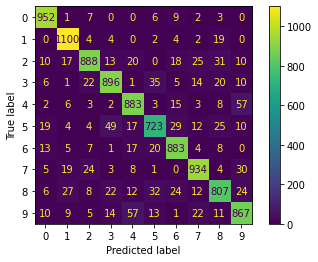

In [23]:
#Logistic Regression
log_reg_conf = confusion_matrix(y_test, log_reg_pred)
log_reg_conf = ConfusionMatrixDisplay(log_reg_conf)
log_reg_conf.plot()

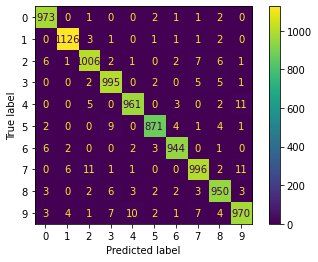

In [24]:
#SVM
svm_conf = confusion_matrix(y_test, svm_pred)
svm_conf = ConfusionMatrixDisplay(svm_conf)
svm_conf.plot()

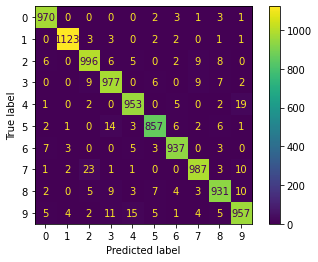

In [37]:
#Random Forest
rf_conf = confusion_matrix(y_test, rf_pred)
rf_conf = ConfusionMatrixDisplay(rf_conf)
rf_conf.plot()

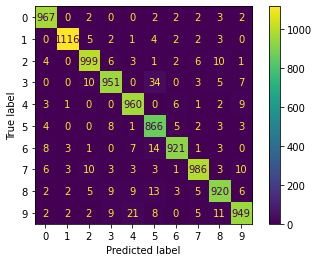

In [26]:
#MPL
mpl_conf = confusion_matrix(y_test, mpl_pred)
mpl_conf = ConfusionMatrixDisplay(mpl_conf)
mpl_conf.plot()

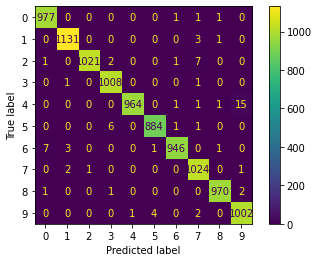

In [61]:
#CNN
cnn_pred = np.argmax(cnn_pred, 1) # Decode Predicted labels
y_test_cnn = np.argmax(y_test_cnn, 1) # Decode labels
cnn_conf = confusion_matrix(y_test_cnn, cnn_pred)
cnn_conf = ConfusionMatrixDisplay(cnn_conf)
cnn_conf.plot()
